# Importing required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Reading Csv file from the PC using pandas

In [2]:
df=pd.read_csv(r"C:\Users\Hp\2 heart_disease_dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


# `Description of the Dataset`
### There are total 14 colums
#### 1) Age : Age of a Person i.e. min age:29, max age: 77
#### 2) Sex : Gender of a person i.e. male=1,female=0
#### 3) cp(chest pain) : Chest pain values i.e 1: Typical Angina, 2:Atypical Angina, 3:Non-Anginal Pain, 4: Asymptomatic Pain
##### Angina: A type of chest pain caused by reduced blood flow to the heart. eg:squeezing, pressure in chest etc
##### * Atypical angina: Epigastric or back pain or pain that is described as burning, stabbing or characterstics of indigestion
##### * Typical angina: Usually includes chest, arm or jaw pain described as dull,heavy ,tight or crushing
##### * Non-Anginal Pain: Chest pain in people without Heart disease
##### * Asymptomatic pain: A silent Heart Attack might cause chest pain or shortness of breathe, which are typically associated with heart attack
##### 4) trestbps(Person Resting Blood Pressure)
##### 5) Chol (cholestrol)
##### 6) fbs(Fasting blood sugar) : Measures your blood sugar after an overnight fast i.e <99 mg/Dl:normal, 100-125 mg/Dl : Prediabetes,>126: diabetes. 1:True,0:False
##### 7) Restecg(Resting Ecg): Records the electrical activity of your heart, while you are at rest i.e 0:Normal,1:ST-T wave abnormality,2: Showing probable or definite Left ventricular Hypertrophy
##### 8) Thalach: Maximum Heart Rate Received i.e To estimate subtract your age from 220
##### 9) Exang(Excercise induced Angina): It occurs with excercise or stress , as the heart pumps harder to keep up what you are doing, it need more oxygen rich blood, if this demand is not met you feel discomfort or pain in your chest i.e 1=Yes,0:No
##### 10) oldpeak: ST depression induced by excercise relative to rest
##### 11) slope=slope of peak excercise ST segment i.e.  1: upsloping, 2: flat, 3: downsloping
##### 12) ca: The number of major vessels(0-3)
##### 13) thal: Thalassemia i.e 3:normal,6:fixed defect(no blood flow in some part of heart),7: reversible defect(a blood flow is observed but it is not normal)
##### 14) num: Heart Disease i.e. Yes=1,No:0

                                          


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

# Checking the datatypes of each column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Checking the missing values


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [6]:
# People having heartattack
num=df.groupby('num').size()
num

num
0    164
1    139
dtype: int64

# Univariate Analysis

## Statistical Analysis


In [7]:
# For age column
minum=df.age.min()
maxum=df.age.max()
avg=df.age.mean()
middle=df.age.median()
stdev=df.age.std()
print(minum)
print(maxum)
print(avg)
print(middle)
print(stdev)
# Looks like meand and median are very close may be there are very few or no outliers

29
77
54.43894389438944
56.0
9.038662442446743


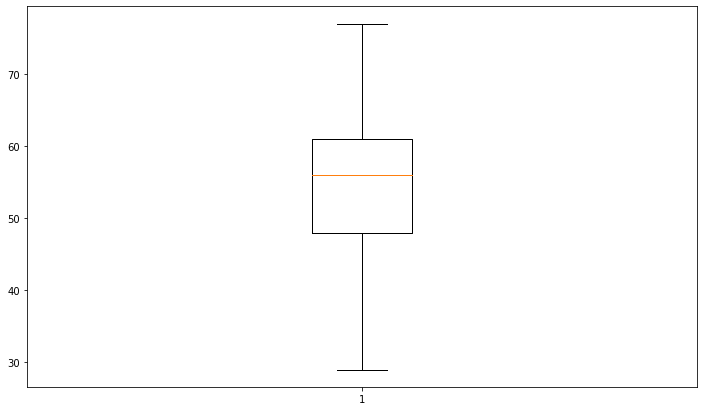

In [8]:
# finding outliers using box plot
fig = plt.figure(figsize =(12,7))
plt.boxplot(df.age)
plt.show()
# From the plot we can say that there are no outliers

<AxesSubplot:ylabel='Density'>

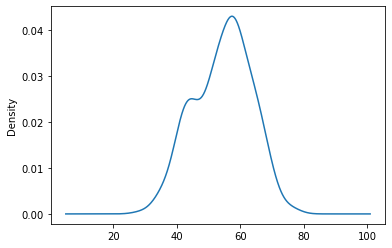

In [9]:
# Finding the distribution of the age column
df.age.plot(kind='kde')

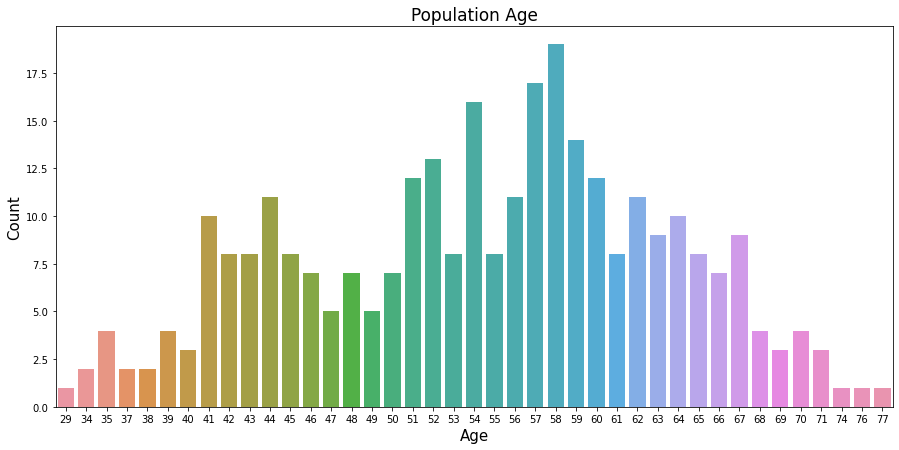

In [10]:
# Counting the age of the population using countplot
plt.figure(figsize=(15,7))
sns.countplot(x='age', data=df)
plt.title('Population Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()


In [11]:
df.num.value_counts()
# num column represent whether a person has a Heart disease or not (0 = no, 1 = yes)

0    164
1    139
Name: num, dtype: int64

In [12]:
def heart_disease(row):
    if row==0:
        return 'No'
    elif row==1:
        return 'Yes'

In [13]:
df['Heart_Disease']=df['num'].apply(heart_disease)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,No
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Yes
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Yes
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,No
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,No


In [14]:
hear_dis=df['Heart_Disease'].value_counts(normalize=True)

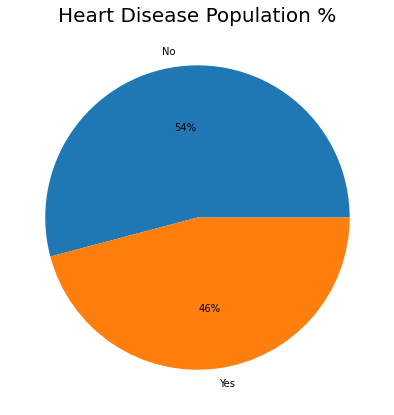

In [15]:
# Heart disease of population in percentage using Pie chart
plt.figure(figsize=(15,7))
plt.pie(num,labels=['No','Yes'],autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

In [16]:
df.sex.value_counts()

1    206
0     97
Name: sex, dtype: int64

In [17]:
def gender(row):
    if row==0:
        return 'Female'
    elif row==1:
        return 'Male'

In [18]:
Sex=df['sex'].value_counts(normalize=True)

In [19]:
df['Sex']=df['sex'].apply(gender)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,Sex
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,No,Male
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Yes,Male
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Yes,Male
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,No,Male
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,No,Female


In [20]:
df.Sex.dtypes

dtype('O')

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

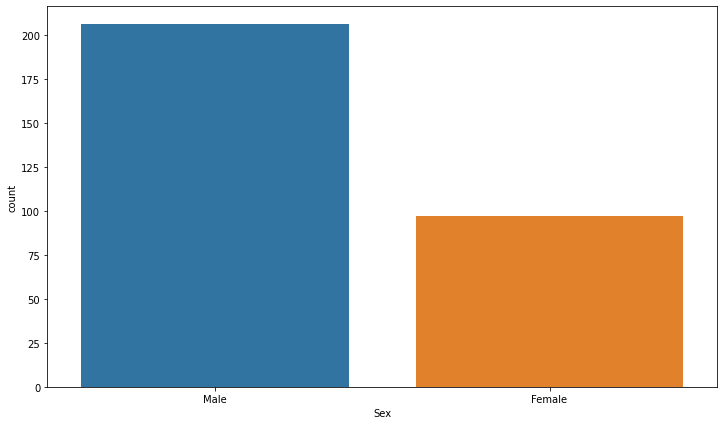

In [21]:
# Representing the Gender of the population using countplot 
plt.figure(figsize=(12,7))
sns.countplot(df.Sex)


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='count'>

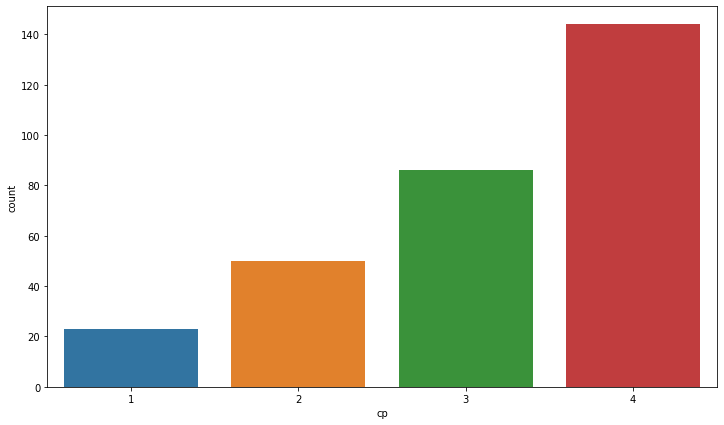

In [22]:
# Plotting a countplot for chest pain for different categories
# 1: typical angina,  2: atypical angina,  3: non-anginal pain,  4: asymptomatic
plt.figure(figsize=(12,7))
sns.countplot(df.cp)

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,Sex
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,No,Male
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Yes,Male
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Yes,Male
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,No,Male
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,No,Female


In [24]:
def age_p(age):
    if age>=29 and age<40:
        return 'Young_Age'
    elif age>=40 and age<55:
        return 'Middle_Age'
    elif age>=55:
        return 'Elderly_Age'
    

In [25]:
df.age.dtypes

dtype('int64')

In [26]:
df['Age']=df['age'].apply(age_p)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,Sex,Age
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,No,Male,Elderly_Age
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Yes,Male,Elderly_Age
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Yes,Male,Elderly_Age
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,No,Male,Young_Age
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,No,Female,Middle_Age


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


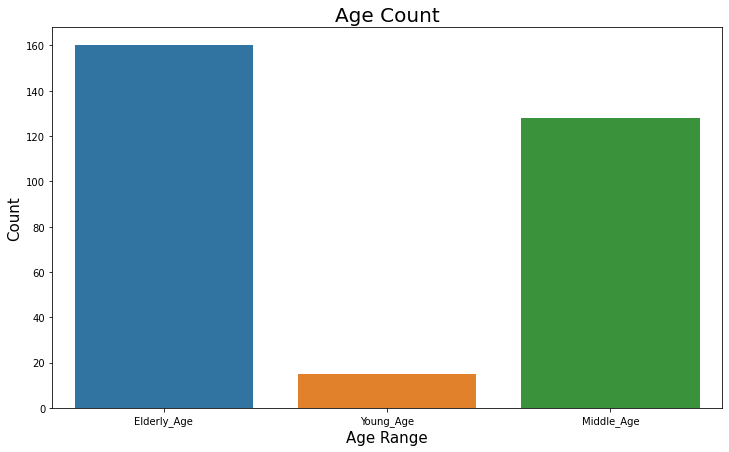

In [27]:
# Representing the age category using countplot 
plt.figure(figsize=(12,7))
sns.countplot(df.Age,)
plt.title('Age Count',fontsize=20)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [28]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,Sex,Age
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,No,Male,Elderly_Age
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Yes,Male,Elderly_Age
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Yes,Male,Elderly_Age
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,No,Male,Young_Age
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,No,Female,Middle_Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,Yes,Male,Middle_Age
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1,Yes,Male,Elderly_Age
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1,Yes,Male,Elderly_Age
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,Yes,Female,Elderly_Age


In [29]:
df.cp.value_counts(normalize=True)

4    0.475248
3    0.283828
2    0.165017
1    0.075908
Name: cp, dtype: float64

In [30]:
df['age'].corr(df['num'])

0.22312029469045147

In [31]:
df['cp'].corr(df.num)

0.41444638790514193

In [32]:
df['trestbps'].corr(df.num)

0.15082544959450628

In [33]:
df.fbs.corr(df.num)

0.025263666975726136

# Bivariate Analysis

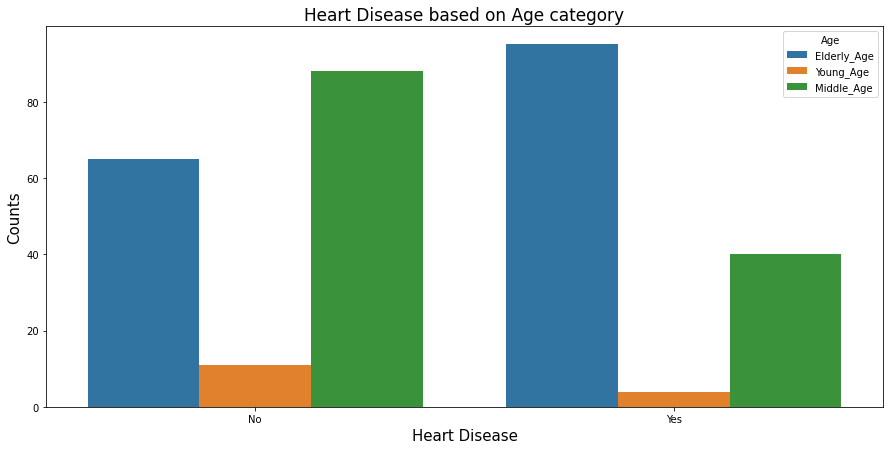

In [34]:
# Heart Disease Based on Age Category
plt.figure(figsize=(15,7))
sns.countplot(x='Heart_Disease',hue=df.Age, data=df)
plt.title('Heart Disease based on Age category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()


### From the above plot we can say that elderly age people are getting more Heart attack and young Age getting low heart attack

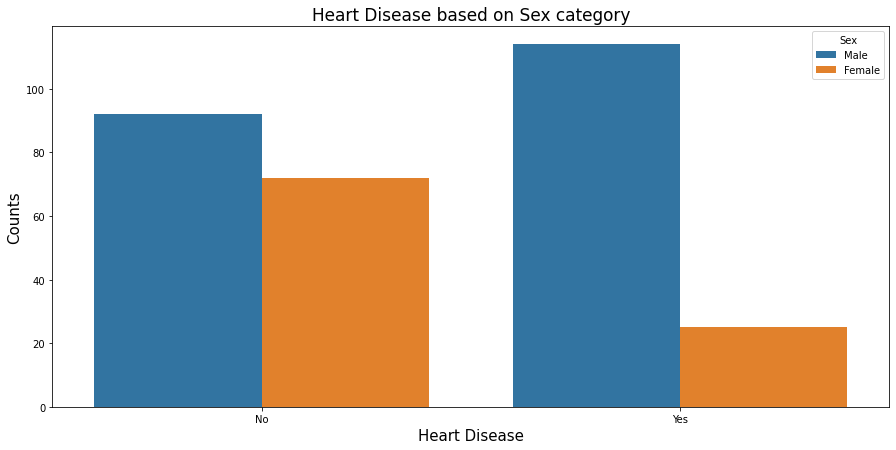

In [35]:
# Heart Disease based on Gender Category
plt.figure(figsize=(15,7))
sns.countplot(x='Heart_Disease',hue=df.Sex, data=df)
plt.title('Heart Disease based on Sex category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()


### From the above plot wew can say that Male gets Heart attack more that female

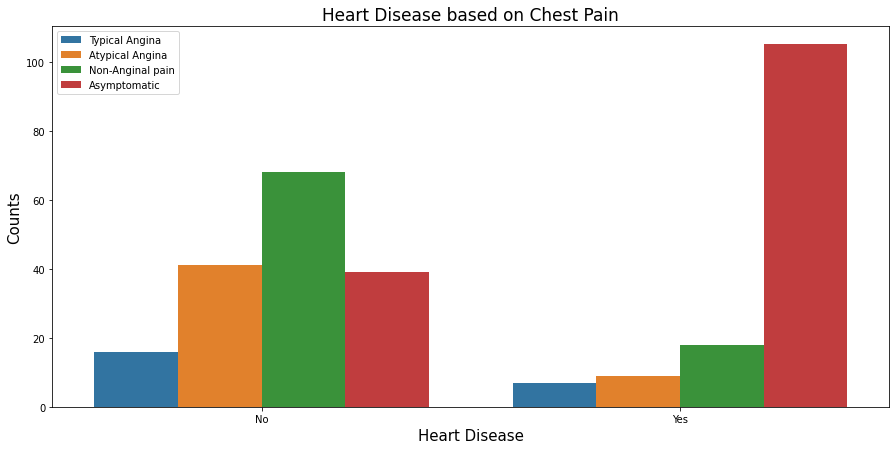

In [36]:
# Heart Disease based on Chest pain
plt.figure(figsize=(15,7))
sns.countplot(x='Heart_Disease',hue=df.cp, data=df)
plt.title('Heart Disease based on Chest Pain', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

### From the above plot we can say that people having more Asymptomatic chest pain gets a Heart attack

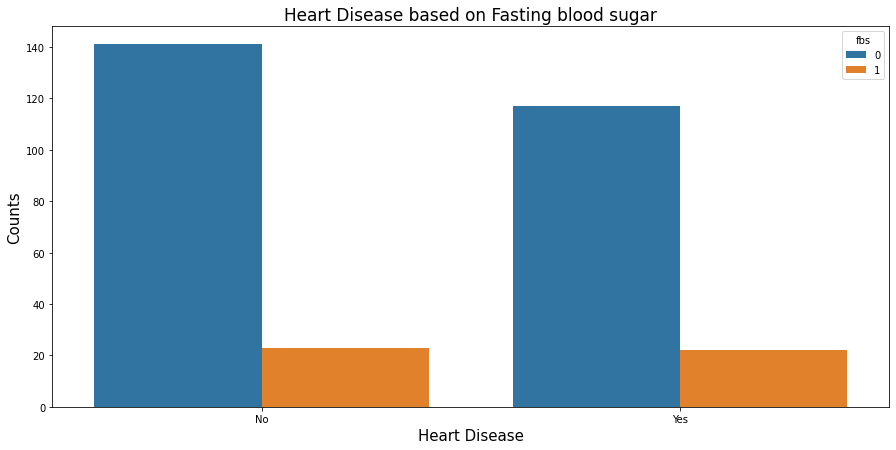

In [37]:
# Heart disease based on fasting blood sugar
plt.figure(figsize=(15,7))
sns.countplot(x='Heart_Disease',hue=df.fbs, data=df)
plt.title('Heart Disease based on Fasting blood sugar', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

### From the above plot we can say that the person's having fasting blood sugar>120mg/dl gets a Heart attack

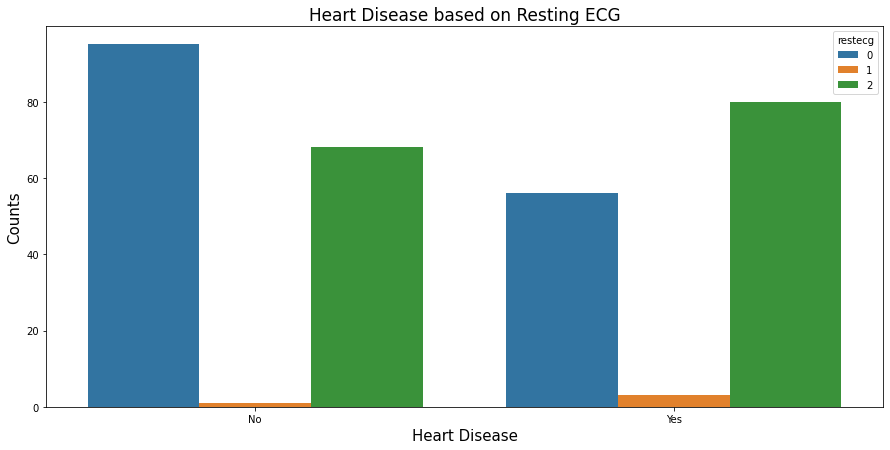

In [38]:
# Heart disease Based on resting ECG
plt.figure(figsize=(15,7))
sns.countplot(x='Heart_Disease',hue=df.restecg, data=df)
plt.title('Heart Disease based on Resting ECG', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

### Heart disease for resting ECG of a person is Higher for category 2 i.e. 2: showing probable or definite Left Ventricular hypertrophy

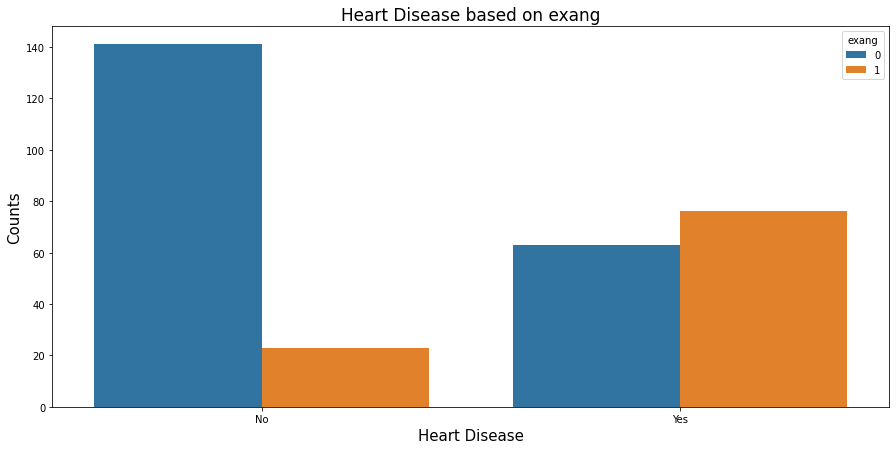

In [39]:
# Heart Disease based on Exercise induced angina
plt.figure(figsize=(15,7))
sns.countplot(x='Heart_Disease',hue=df.exang, data=df)
plt.title('Heart Disease based on exang', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

### From the countplot we can say that the person who induced angina due to excercise is more of having Heart attack as compared to person not doing any excercise

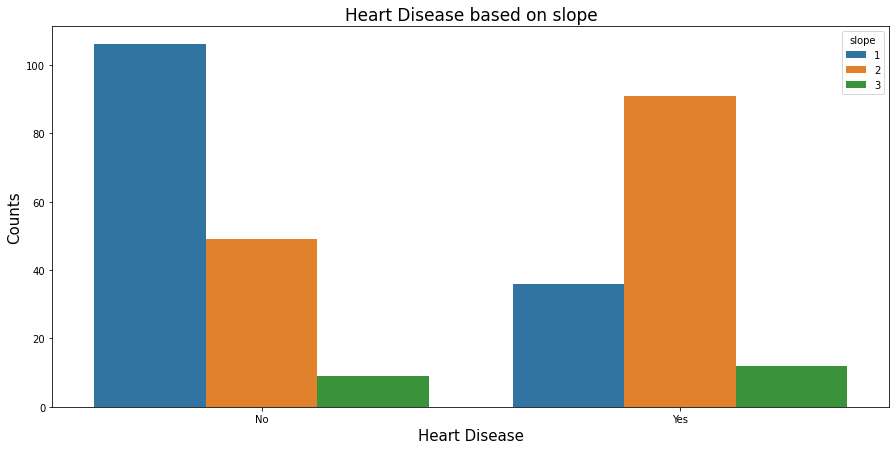

In [40]:
#Heart disease based on ST depression induced by exercise relative to rest
plt.figure(figsize=(15,7))
sns.countplot(x='Heart_Disease',hue=df.slope, data=df)
plt.title('Heart Disease based on slope', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

### We can say that the person having more heart disease has a slope of category 2

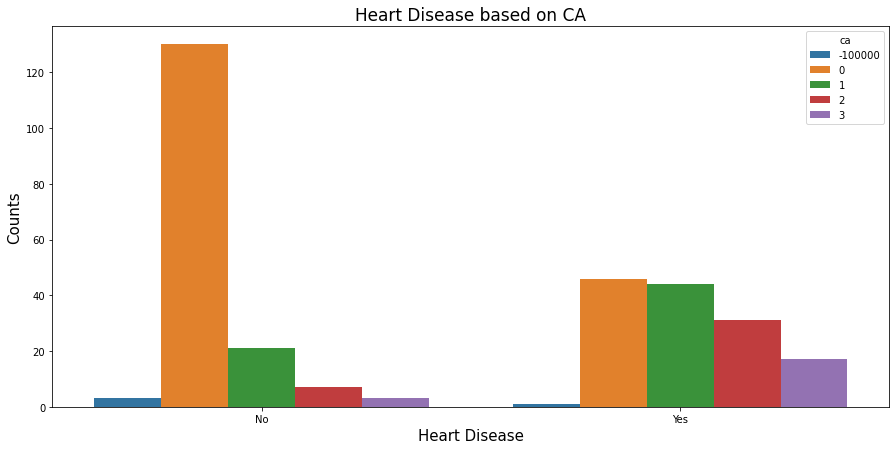

In [41]:
# Heart Disease based on The number of major vessels
plt.figure(figsize=(15,7))
sns.countplot(x='Heart_Disease',hue=df.ca, data=df)
plt.title('Heart Disease based on CA', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

### The category 0 and 1 has almost equal chance of getting blocked, having heartattack

In [59]:
df.ca

0           0
1           3
2           2
3           0
4           0
        ...  
298         0
299         2
300         1
301         1
302   -100000
Name: ca, Length: 303, dtype: int64

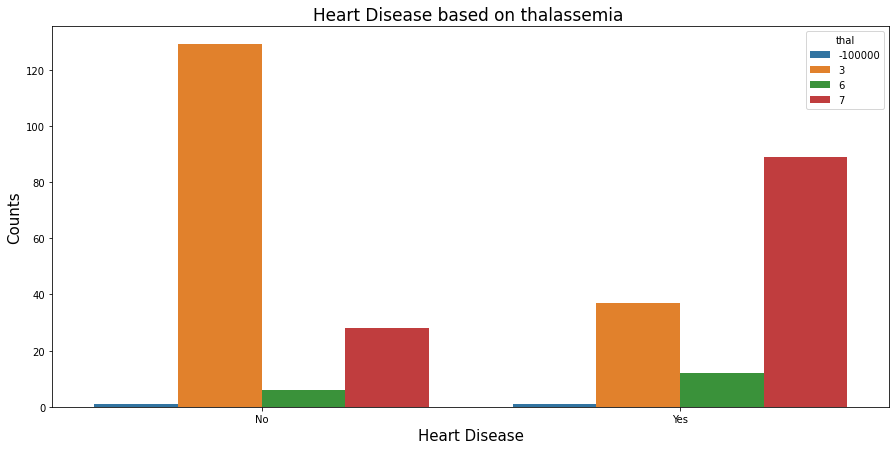

In [42]:
# Heart Disease based on thalassemia
plt.figure(figsize=(15,7))
sns.countplot(x='Heart_Disease',hue=df.thal, data=df)
plt.title('Heart Disease based on thalassemia ', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

### We can say people having thallecemia of category 7 is having more heart Attack as compared to other categories

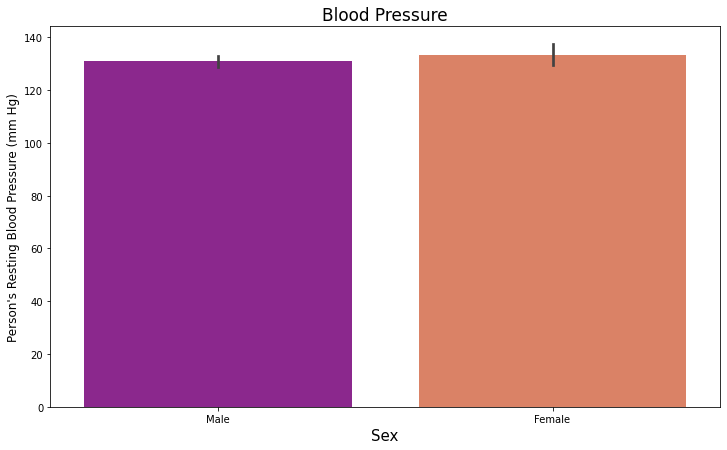

In [43]:
#Bar Plot Creation of Person's Resting Blood Pressure (mm Hg) using MatplotLib and Seaborn
plt.figure(figsize=(12,7))
sns.barplot(x='Sex', y='trestbps', data=df, palette='plasma')
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

### We can say that bp of male is slightly lower than bp of female

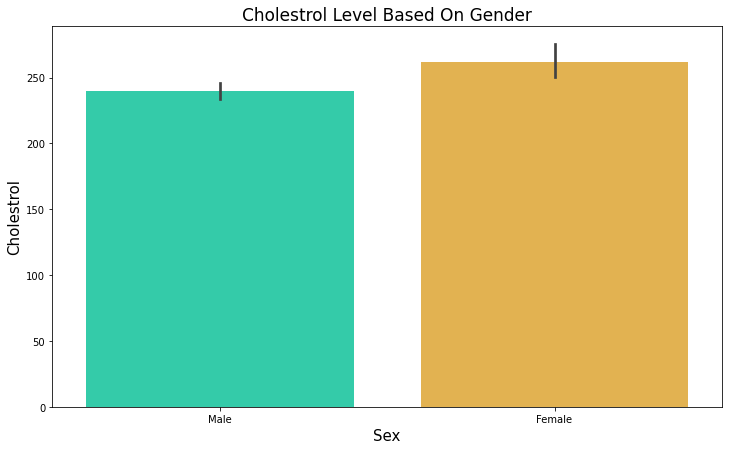

In [44]:
plt.figure(figsize=(12,7))
sns.barplot(x='Sex', y='chol', data=df, palette='turbo')
plt.title("Cholestrol Level Based On Gender", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()

### Cholestrol of female is more as compared to male

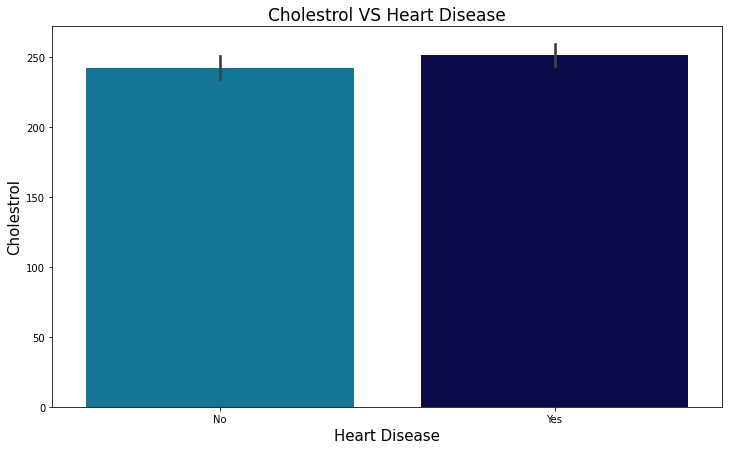

In [45]:
#Bar Plot Creation of Cholestrol Level Based On Gender using MatplotLib and Seaborn
plt.figure(figsize=(12,7))
sns.barplot(x='Heart_Disease', y='chol', data=df, palette='ocean_r')
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()


### Higher value of cholestrol means higher chances of Heart attack

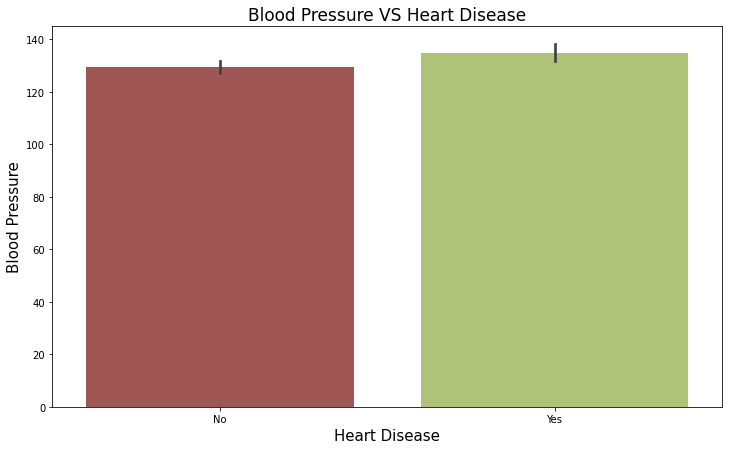

In [46]:
#Bar Plot Creation of Heart Disease Based On Blood pressure using MatplotLib and Seaborn
plt.figure(figsize=(12,7))
sns.barplot(x='Heart_Disease', y='trestbps', data=df, palette='tab20b_r')
plt.title('Blood Pressure VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

### Higher Blood Pressure Level results Chances Of Heart Disease

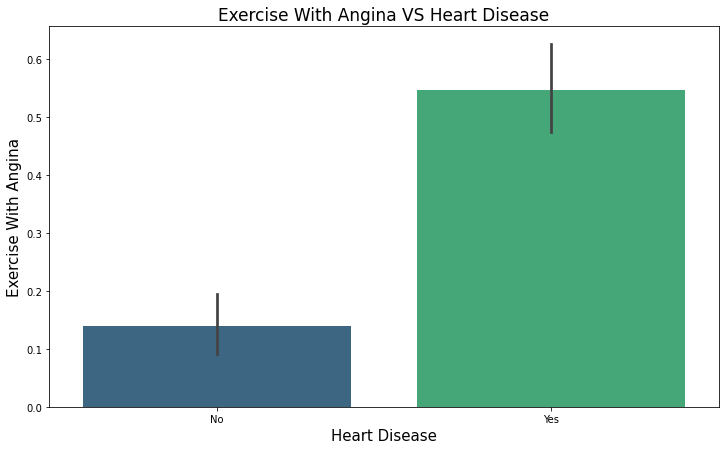

In [48]:
# plotting Heart disease with respect to axcercise induced Angina using matplotlib and seaborn
plt.figure(figsize=(12,7))
sns.barplot(x='Heart_Disease', y='exang', data=df, palette='viridis')
plt.title('Exercise With Angina VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

### More the Excercise with Angina more the chances of getting Heart Attack

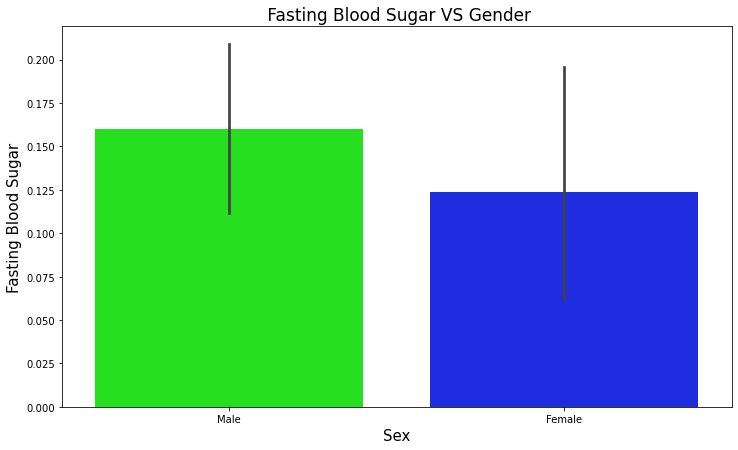

In [50]:
#Bar Plot Creation of Fasting Blood Sugar VS Gender using MatplotLib and Seaborn
plt.figure(figsize=(12,7))
sns.barplot(y='fbs', x='Sex', data=df, palette='hsv')
plt.title(' Fasting Blood Sugar VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()


### Fasting Blood sugar is more for male gender as compared to Female Gender

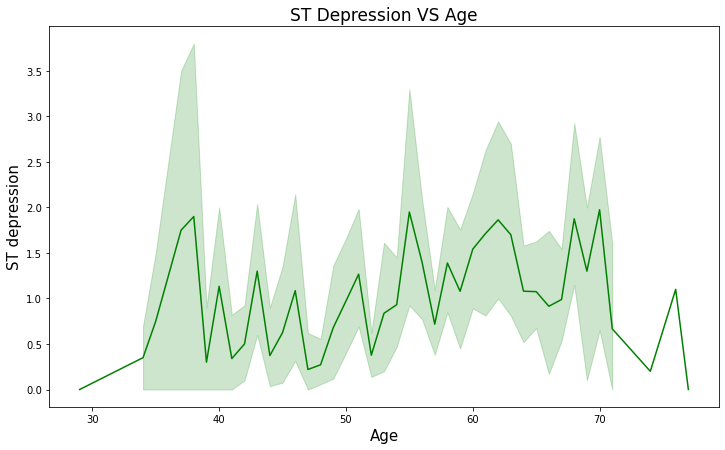

In [51]:
#Line Plot Creation of ST Depression VS Age using MatplotLib and Seaborn
plt.figure(figsize=(12,7))
sns.lineplot(x='age', y='oldpeak', data=df, color='g')
plt.title('ST Depression VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()


###  we can observe from here that ST depression mostly increases bw the age group of 30-40

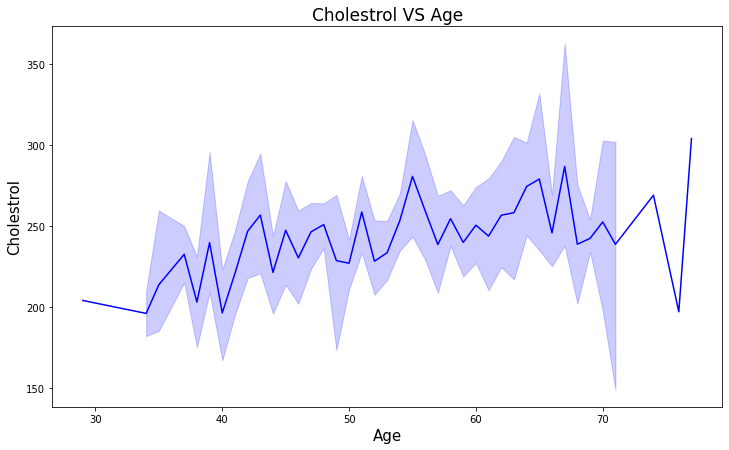

In [52]:
#Line Plot Creation of Cholestrol VS Age using MatplotLib and Seaborn
plt.figure(figsize=(12,7))
sns.lineplot(x='age', y='chol', data=df, color='b')
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

### Cholestrol Increasing in the age group of 50-60

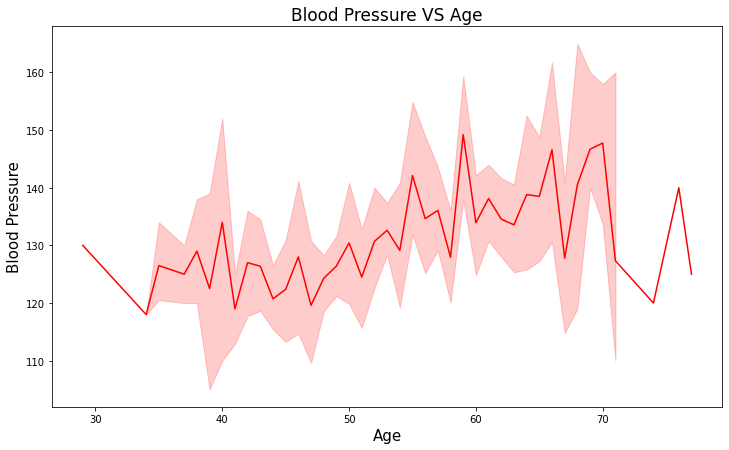

In [53]:
#Line Plot Creation of Blood Pressure VS Age using MatplotLib and Seaborn
plt.figure(figsize=(12,7))
sns.lineplot(x='age', y='trestbps', data=df, color='r')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()


### Blood Pressure increases between age of 50 to 60 and somehow continue the pattern till 70

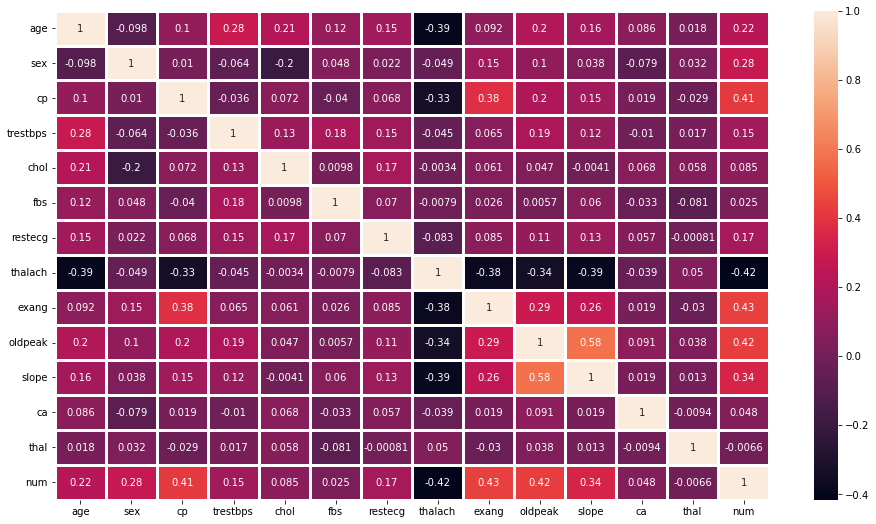

In [54]:
#Heatmap Creation using Seaborn

plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True, linewidth=3)
plt.show()

### Each square shows the correlation between the variables on each axis.
### Correlation ranges from -1 to +1
### The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.
### A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases
###  The diagonals are all 1/ white because those squares are correlating each variable to itself (so it's a perfect correlation)
## Here in this plot there is maximum positive correlation between the chest pain and num(Heart Disease) of 41% and in the second 38% correlated between chest pain and excercise induces angina.
## The minimum correlation is between ca and sex of -7.9 , means negatively correlated
